In [63]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
sns.set(style='ticks',color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [64]:
#from google.colab import files
#uploaded=files.upload()

In [65]:
data = pd.read_csv("/content/Telecom Churn Rate Dataset.csv") 
data

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,No
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,No
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Female,Yes,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,1035.0,12420,0,0,No
1138,Female,Yes,No,No,6,No,No phone service,DSL,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,444.0,5328,0,0,No
1139,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,...,No,No,One year,No,Credit card (automatic),600.0,7200,0,0,No
1140,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,757.5,9090,0,0,Yes


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

In [67]:
#checking for null values
data.isnull().any()

Gender                False
Senior_Citizen        False
Partner               False
Dependents            False
Tenure                False
Phone_Service         False
Multiple_Lines        False
Internet_Service      False
Online_Security       False
Online_Backup         False
Device_Protection     False
Tech_Support          False
Streaming_TV          False
Streaming_Movies      False
Contract              False
Paper_less_Billing    False
Payment_Method        False
Monthly_Charges       False
Yearly_Charge         False
Admin_Tickets         False
Tech_Tickets          False
Churn                 False
dtype: bool

In [68]:
data.isnull().sum()

Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paper_less_Billing    0
Payment_Method        0
Monthly_Charges       0
Yearly_Charge         0
Admin_Tickets         0
Tech_Tickets          0
Churn                 0
dtype: int64

In [69]:
data['Gender']=data['Gender'].replace({'Male': 0,'Female':1})
data['Senior_Citizen']=data['Senior_Citizen'].replace({'Yes': 0,'No':1})
data['Dependents']=data['Dependents'].replace({'No': 0,'Yes':1})
data['Partner']=data['Partner'].replace({'No': 0,'Yes':1})
data['Tenure']=data['Tenure'].replace({'1': 0,'71':1})
data['Phone_Service']=data['Phone_Service'].replace({'No': 0,'Yes':1})
data['Multiple_Lines']=data['Multiple_Lines'].replace({'No': 0,'Yes':1,'No phone service':2})
data['Online_Security']=data['Online_Security'].replace({'No': 0,'Yes':1,'No internet service':2})
data['Online_Backup']=data['Online_Backup'].replace({'No': 0,'Yes':1,'No internet service':2})
data['Streaming_TV']=data['Streaming_TV'].replace({'Yes': 0,'No':1,'No internet service':2})
data['Streaming_Movies']=data['Streaming_Movies'].replace({'Yes': 0,'No':1,'No internet service':2})
data['Paper_less_Billing']=data['Paper_less_Billing'].replace({'No': 0,'Yes':1})
data['Churn']=data['Churn'].replace({'Yes': 0,'No':1})
data['Contract']=data['Contract'].replace({'Month-to-month': 0,'Two year':2,'One year':1})
data['Internet_Service']=data['Internet_Service'].replace({'DSL': 0,'Fiber optic':1,'No':2})
data['Payment_Method']=data['Payment_Method'].replace({'Electronic check': 0,'Credit card (automatic)':1,'Bank transfer (automatic)':2,'Mailed check':3})
data['Device_Protection']=data['Device_Protection'].replace({'No': 0,'Yes':1,'No internet service':2})
data['Tech_Support']=data['Tech_Support'].replace({'No': 0,'Yes':1,'No internet service':2})


In [70]:
#data.head(10)
data

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,0,0,0,0,1,0,2,0,0,0,...,1,0,0,1,0,396.5,4758,0,0,0
1,1,0,1,0,71,1,1,1,1,1,...,1,1,2,1,1,963.5,11562,0,0,1
2,0,0,1,0,2,1,0,1,0,0,...,0,0,0,1,1,955.0,11460,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,1,1,0,0,2,452.5,5430,0,0,1
4,1,0,0,0,43,1,1,1,0,1,...,0,1,0,1,0,902.5,10830,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1,0,1,0,63,1,1,1,0,1,...,0,0,0,1,0,1035.0,12420,0,0,1
1138,1,0,0,0,6,0,2,0,0,0,...,0,0,0,1,0,444.0,5328,0,0,1
1139,0,0,1,0,55,1,1,0,1,1,...,1,1,1,0,1,600.0,7200,0,0,1
1140,0,0,0,0,1,1,1,1,0,0,...,1,1,0,1,0,757.5,9090,0,0,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   int64  
 1   Senior_Citizen      1142 non-null   int64  
 2   Partner             1142 non-null   int64  
 3   Dependents          1142 non-null   int64  
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   int64  
 6   Multiple_Lines      1142 non-null   int64  
 7   Internet_Service    1142 non-null   int64  
 8   Online_Security     1142 non-null   int64  
 9   Online_Backup       1142 non-null   int64  
 10  Device_Protection   1142 non-null   int64  
 11  Tech_Support        1142 non-null   int64  
 12  Streaming_TV        1142 non-null   int64  
 13  Streaming_Movies    1142 non-null   int64  
 14  Contract            1142 non-null   int64  
 15  Paper_less_Billing  1142 non-null   int64  
 16  Paymen

In [72]:
x= data.iloc[:,0:20].values
y= data.iloc[:,21:].values

In [73]:
x

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.9650e+02, 4.7580e+03,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 9.6350e+02, 1.1562e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 9.5500e+02, 1.1460e+04,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 6.0000e+02, 7.2000e+03,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.5750e+02, 9.0900e+03,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 7.4400e+02, 8.9280e+03,
        0.0000e+00]])

In [74]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [75]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()

a= one.fit_transform(x[:,6:7]).toarray()

b= one.fit_transform(x[:,7:8]).toarray()

c= one.fit_transform(x[:,8:9]).toarray()

d= one.fit_transform(x[:,9:10]).toarray()

e= one.fit_transform(x[:,10:11]).toarray()

f= one.fit_transform(x[:,11:12]).toarray()

g= one.fit_transform(x[:,12:13]).toarray()

h= one.fit_transform(x[:,13:14]).toarray()

i= one.fit_transform(x[:,14:15]).toarray()

j= one.fit_transform(x[:,15:16]).toarray()

x=np.delete(x,[6,7,8,9,10,11,12,13,14,16], axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x), axis=1)

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
smt = SMOTE()
x_resample, y_resample=smt.fit_resample(x,y)

In [78]:
x_resample

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.96500000e+02, 4.75800000e+03, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.63500000e+02, 1.15620000e+04, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.55000000e+02, 1.14600000e+04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00873736e+03, 1.21048483e+04, 3.15660796e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.14081043e+02, 9.76897251e+03, 0.00000000e+00],
       [8.38134796e-01, 1.61865204e-01, 0.00000000e+00, ...,
        8.59676270e+02, 1.03161152e+04, 4.19067398e+00]])

In [79]:

y_resample

array([0, 1, 1, ..., 0, 0, 0])

In [80]:
data.describe()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
count,1142.000000,1142.0,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,...,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,0.497373,0.0,0.501751,0.079685,33.295972,0.908932,0.764448,0.818739,0.338004,0.507881,...,0.544658,0.524518,0.420315,0.767075,0.848511,798.203590,9578.443082,0.513135,0.684764,0.583187
std,0.500212,0.0,0.500216,0.270923,24.188530,0.287832,0.602097,0.489575,0.561339,0.584213,...,0.582556,0.583751,0.705710,0.422880,1.015564,237.640267,2851.683204,1.296967,1.550357,0.493247
min,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.500000,2274.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,701.500000,8418.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,848.500000,10182.000000,0.000000,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,980.750000,11769.000000,0.000000,0.000000,1.000000
max,1.000000,0.0,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,1174.500000,14094.000000,5.000000,9.000000,1.000000


<Axes: xlabel='Monthly_Charges', ylabel='Density'>

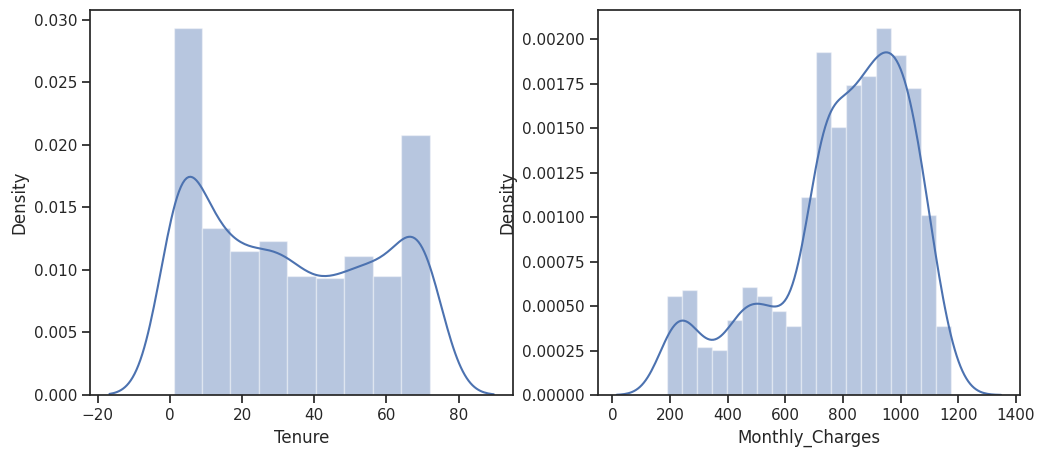

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["Tenure"])  
plt.subplot(1,2,2)
sns.distplot(data["Monthly_Charges"])

<Axes: ylabel='count'>

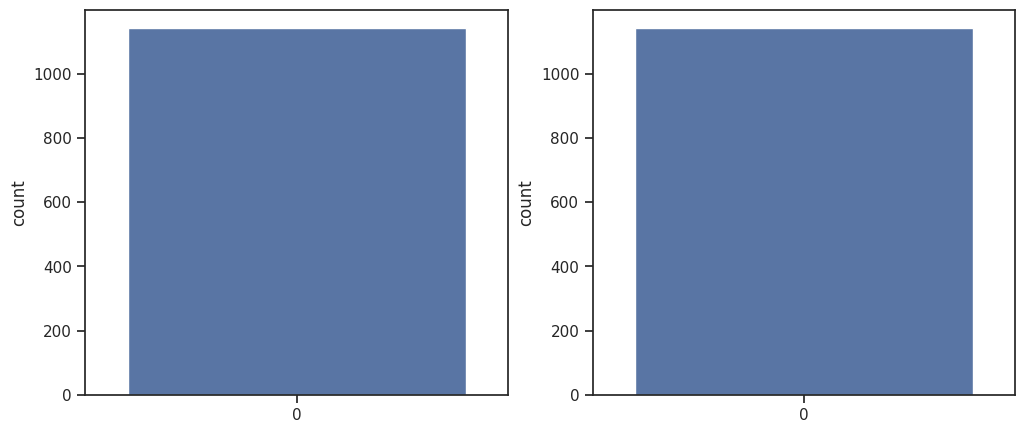

In [82]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["Gender"])
plt.subplot(1,2,2)
sns.countplot(data["Dependents"])

<Axes: xlabel='Churn', ylabel='Monthly_Charges'>

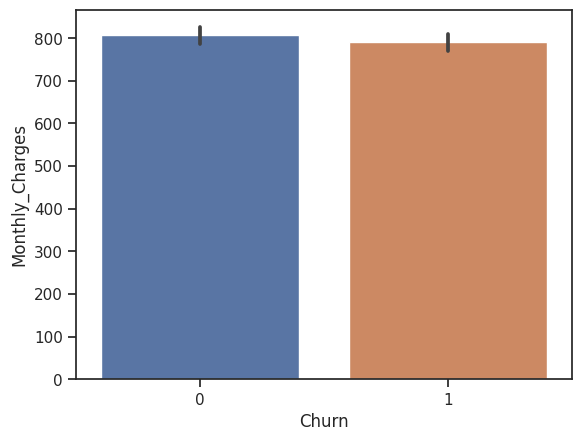

In [83]:
sns.barplot(x="Churn",y="Monthly_Charges",data=data)

<Axes: >

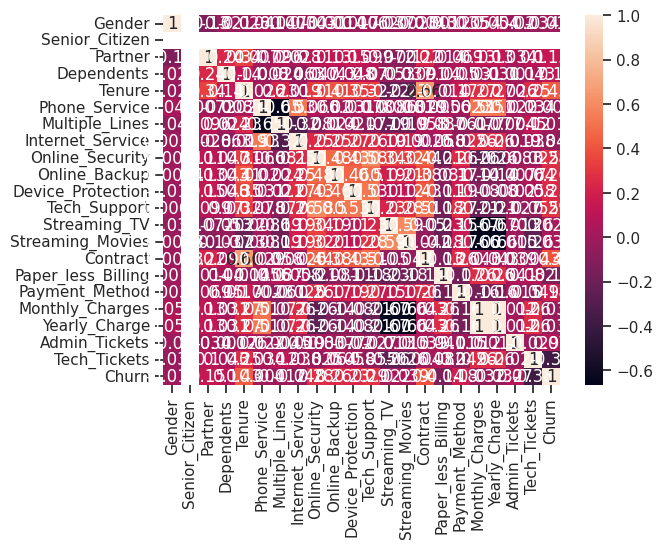

In [84]:
sns.heatmap(data.corr(), annot=True)   

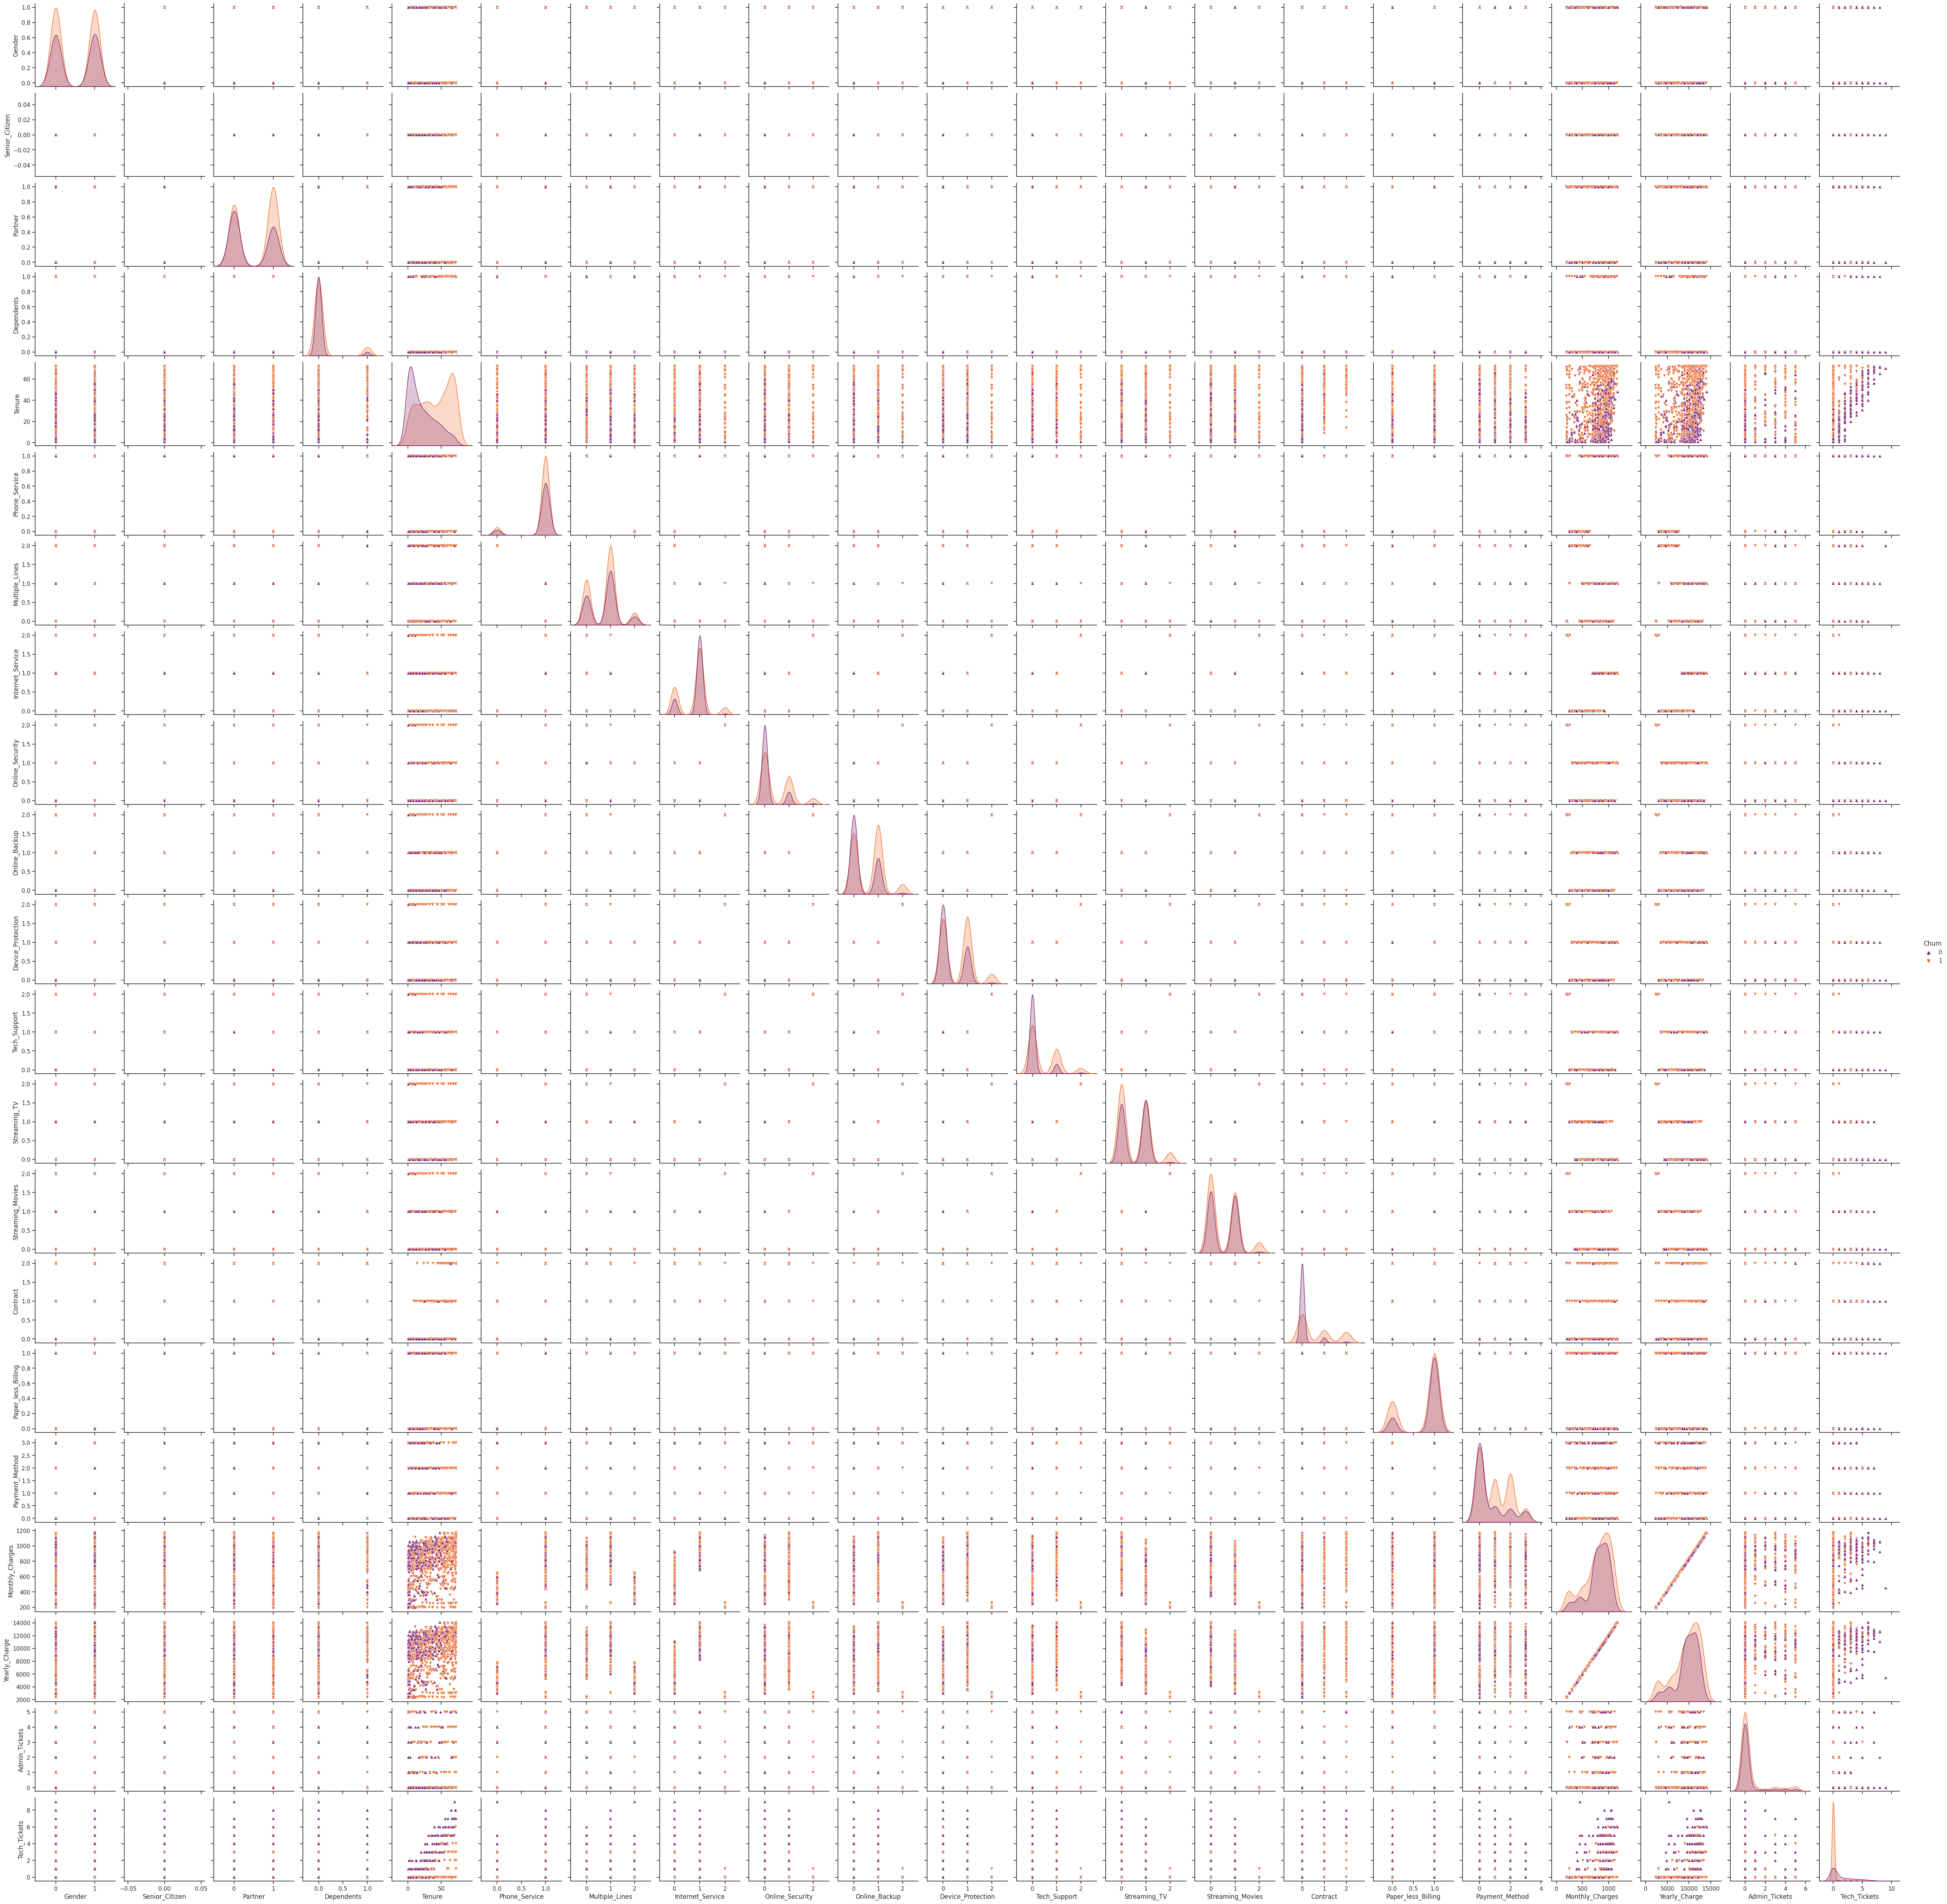

In [85]:
sns.pairplot(data=data, markers=["^","v"],  hue='Churn',palette="inferno")

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=0)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [88]:
y_train.shape

(1065,)

In [125]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [89]:
x_train.shape

(1065, 39)

In [126]:
x_train

array([[-0.69405594, -1.21843461,  3.21741303, ..., -1.30271201,
        -1.30271201,  3.53119805],
       [-0.4877611 ,  0.64527253, -0.31531383, ..., -1.28284386,
        -1.28284386, -0.3982693 ],
       [-0.69405594,  0.84046276, -0.31531383, ...,  0.09040151,
         0.09040151, -0.3982693 ],
       ...,
       [ 1.48197468, -1.21843461, -0.31531383, ..., -0.41502985,
        -0.41502985,  2.0371712 ],
       [-0.69405594, -1.21843461,  3.21741303, ..., -0.8985371 ,
        -0.8985371 , -0.3982693 ],
       [-0.69405594,  0.84046276, -0.31531383, ...,  0.89875133,
         0.89875133, -0.3982693 ]])

In [90]:
#importing and building the LogisticRegression model
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train) 
    print(accuracy_score(y_lr_tr,y_train))
    yPred_lr = lr.predict(x_test)
    print(accuracy_score(yPred_lr,y_test)) 
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_lr)) 
    print("Classification_Report") 
    print(classification_report(y_test,yPred_lr))

In [91]:
#printing the train accuracy and test accuracy respectively
logreg(x_train,x_test,y_train,y_test)

0.7361502347417841
0.7228464419475655
***Logistic Regression***
Confusion_Matrix
[[99 33]
 [41 94]]
Classification_Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       132
           1       0.74      0.70      0.72       135

    accuracy                           0.72       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.72      0.72      0.72       267



In [92]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train) 
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test)) 
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_dt)) 
    print("Classification_Report") 
    print(classification_report(y_test,yPred_dt))

In [93]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

0.9990610328638497
0.700374531835206
***Decision Tree***
Confusion_Matrix
[[107  25]
 [ 55  80]]
Classification_Report
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       132
           1       0.76      0.59      0.67       135

    accuracy                           0.70       267
   macro avg       0.71      0.70      0.70       267
weighted avg       0.71      0.70      0.70       267



In [94]:
#importing and buliding the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    yPred_rf = rf.predict(x_test)
    print(accuracy_score(yPred_rf,y_test))
    print("***Random Forest***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_rf))
    print("Classification_Report")
    print(classification_report(y_test,yPred_rf))

In [95]:
#printing the train accuracy and test accuracy respectively
RandomForest(x_train,x_test,y_train,y_test)

0.9784037558685446
0.6816479400749064
***Random Forest***
Confusion_Matrix
[[121  11]
 [ 74  61]]
Classification_Report
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       132
           1       0.85      0.45      0.59       135

    accuracy                           0.68       267
   macro avg       0.73      0.68      0.66       267
weighted avg       0.74      0.68      0.66       267



In [96]:
#importing and buliding the KNN model
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    yPred_knn = knn.predict(x_test)
    print(accuracy_score(yPred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_knn))
    print("Classification_Report")
    print(classification_report(y_test,yPred_knn))


In [97]:
#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

0.7821596244131456
0.6928838951310862
***KNN***
Confusion_Matrix
[[107  25]
 [ 57  78]]
Classification_Report
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       132
           1       0.76      0.58      0.66       135

    accuracy                           0.69       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.71      0.69      0.69       267



In [98]:
#importing and buliding the SVM model
def svm(x_train,x_test,y_train,y_test):
    svm = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
    svm.fit(x_train,y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    yPred_svm = svm.predict(x_test)
    print(accuracy_score(yPred_svm,y_test))
    print("***Support Vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_svm))
    print("Classification_Report")
    print(classification_report(y_test,yPred_svm))

In [99]:
#printing the train accuracy and test accuracy respectively
"""svm(x_train,x_test,y_train,y_test)"""

'svm(x_train,x_test,y_train,y_test)'

In [100]:
import tensorflow as tf
from tensorflow.python import keras
from keras import layers
from keras.layers import Activation,Dense


In [101]:
classifier = keras.Sequential()
classifier.add(Dense(units=30, activation='relu', input_dim=40))
classifier.add(Dense (units=30, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
classifier.add(Dense(units=30, activation= 'relu', input_dim=40))

In [103]:
classifier.add(Dense(units=30, activation= 'relu'))

In [104]:
classifier.add(Dense(units=1, activation= 'sigmoid'))

In [105]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
x_train

array([[-0.69405594, -1.21843461,  3.21741303, ..., -1.30271201,
        -1.30271201,  3.53119805],
       [-0.4877611 ,  0.64527253, -0.31531383, ..., -1.28284386,
        -1.28284386, -0.3982693 ],
       [-0.69405594,  0.84046276, -0.31531383, ...,  0.09040151,
         0.09040151, -0.3982693 ],
       ...,
       [ 1.48197468, -1.21843461, -0.31531383, ..., -0.41502985,
        -0.41502985,  2.0371712 ],
       [-0.69405594, -1.21843461,  3.21741303, ..., -0.8985371 ,
        -0.8985371 , -0.3982693 ],
       [-0.69405594,  0.84046276, -0.31531383, ...,  0.89875133,
         0.89875133, -0.3982693 ]])

In [107]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [108]:
# Fitting the AVM to the Training set
model_history = classifier.fit(x_train, y_train, batch_size=10, validation_split=0.3, epochs=200)

Epoch 1/200
75/75 [==============================] - 2s 7ms/step - loss: 0.6805 - accuracy: 0.5477 - val_loss: 0.6581 - val_accuracy: 0.7031
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6523 - val_loss: 0.6175 - val_accuracy: 0.7125
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7289 - val_loss: 0.5965 - val_accuracy: 0.6875
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7329 - val_loss: 0.5871 - val_accuracy: 0.6906
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 0.5424 - accuracy: 0.7503 - val_loss: 0.5833 - val_accuracy: 0.6906
Epoch 6/200
75/75 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7503 - val_loss: 0.5814 - val_accuracy: 0.6844
Epoch 7/200
75/75 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.7503 - val_loss: 0.5936 - val_accuracy: 0.6844
Epoch 8/200
7

In [109]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [110]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification_Report")
print(classification_report(y_test,ann_pred))

0.700374531835206
***ANN Model***
Confusion_Matrix
[[96 36]
 [44 91]]
Classification_Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       132
           1       0.72      0.67      0.69       135

    accuracy                           0.70       267
   macro avg       0.70      0.70      0.70       267
weighted avg       0.70      0.70      0.70       267



In [111]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own = lr.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",lr_pred_own)

Predicting on random input
output is: [1]


In [112]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",dtc_pred_own)

Predicting on random input
output is: [1]


In [113]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rf_pred_own)

Predicting on random input
output is: [1]


In [114]:
from sklearn.svm import SVC # "Support vector classifier"  
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train, y_train)  
#svm = RandomForestClassifier(criterion="entropy",n_estimators=10, random_state=0)
#svm.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svm.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",svm_pred_own)

Predicting on random input
output is: [1]


In [115]:
knn = RandomForestClassifier(criterion="entropy",n_estimators=10, random_state=0)
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = rf.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",knn_pred_own)

Predicting on random input
output is: [1]


In [116]:
print("Predicting on random input")
ann_pred_own = classifier.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

Predicting on random input
[[0.99983245]]
output is:  [[ True]]


In [117]:
def compareModel(x_train,x_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('_'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('_'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('_'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('_'*100)
    #svm(x_train,x_test,y_train,y_test)
    #print('_'*100)
    

In [118]:
compareModel(x_train,x_test,y_train,y_test)

0.7361502347417841
0.7228464419475655
***Logistic Regression***
Confusion_Matrix
[[99 33]
 [41 94]]
Classification_Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       132
           1       0.74      0.70      0.72       135

    accuracy                           0.72       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.72      0.72      0.72       267

____________________________________________________________________________________________________
0.9990610328638497
0.700374531835206
***Decision Tree***
Confusion_Matrix
[[107  25]
 [ 55  80]]
Classification_Report
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       132
           1       0.76      0.59      0.67       135

    accuracy                           0.70       267
   macro avg       0.71      0.70      0.70       267
weighted avg       0.71      0.70      0.70       267

____

In [119]:
print (accuracy_score(ann_pred,y_test))
print("**ANN Model**")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.700374531835206
**ANN Model**
Confusion_Matrix
[[96 36]
 [44 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       132
           1       0.72      0.67      0.69       135

    accuracy                           0.70       267
   macro avg       0.70      0.70      0.70       267
weighted avg       0.70      0.70      0.70       267



In [120]:
from sklearn import model_selection
models= ['dt',DecisionTreeClassifier(),
           'rf',RandomForestClassifier(),'svm',SVC(),'knn',KNeighborsClassifier()]

In [121]:

rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
y_rf = rf.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv = rf.predict(x_test)
print(accuracy_score(yPred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("Classification Report")
print(classification_report(y_test,yPred_rfcv))
print("Predicting on random input")
rfcv_pred_own = rf.predict(sc.transform([[0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rfcv_pred_own)

0.9784037558685446
0.6816479400749064
***Random Forest after Hyperparameter tuning***
Confusion_Matrix
[[121  11]
 [ 74  61]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       132
           1       0.85      0.45      0.59       135

    accuracy                           0.68       267
   macro avg       0.73      0.68      0.66       267
weighted avg       0.74      0.68      0.66       267

Predicting on random input
output is:  [1]


In [122]:
#classifier.save("telcom_churn.h5")

In [123]:
import pickle

In [124]:
pickle.dump(models,open('rfcv.pkl','wb'))